# Imports

In [2]:
Path('/mnt/scripts').exists()

True

In [1]:
#Run in pathml_jupyter.sif or similar image with opencv, scipy, sklearn, matplotlib etc
#or pointpats_jupyter.sif
# apptainer shell -B  ~/HCC-CBS-028-Pfizer-TBruno:/mnt --nv ~/odrive/data_transfer/pathml_jupyter.simg
import os
import sys
import pdb
import time
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm
hpc = False
work_desktop = True
work_linux = True
singularity = True
prj = "HCC-CBS-162-Hillman-BFerris-18139-HN-Vectra"
if not hpc:
    if work_desktop:
        if singularity:
            base = Path('/mnt/data')
            scripts = Path('/mnt/scripts')
        else:
            if work_linux == True:
                base = Path('/mnt/d/OneDrive - University of Pittsburgh/Internal_Project_Data_2/%s' % proj)
            else:
                base = Path(r'D:\OneDrive - University of Pittsburgh\Internal_Project_Data_2\%s' % proj)
            scripts = base.joinpath('scripts')
    else: #Laptop
        base = Path('/home/brian/data/odrive/Internal_Project_Data_2/%s' % proj)
        scripts = base.joinpath('scripts')
else:
    if singularity:
        base = Path('/mnt') 
    else:
        base = Path('/ix/rbao/Projects/%s' % proj)
    scripts = base.joinpath('scripts')
                        
#Custom helper functions:
sys.path.append(str(scripts.joinpath('inform_vectra_tools')))
from inform_vectra_tools import vecutils

%load_ext autoreload
%autoreload 2

results = base.joinpath('results')
sampleinfo = base.joinpath('sampleinfo')
info = pd.read_excel(sampleinfo.joinpath('18_139_clinical_information.xlsx'),header=1)
data = base.joinpath('data')
data =  data.joinpath('cell_seg')
print(data.exists())


all_fns = [str(x) for x in data.rglob('*cell_seg_data.txt')]
print('vectra outputs',len(all_fns))

c_tma = 0
c_wts = 0
for fn in all_fns:
    if 'TMA' in fn:
        c_tma = c_tma + 1
    else:
        # print('WTS file:', fn)
        c_wts = c_wts + 1
print('TMA:',c_tma, 'WTS:', c_wts)

#Load in an example
txt = [data.joinpath(all_fns[0])]
print(txt)
df = pd.read_csv(txt[0], sep='\t')
keep_cols = vecutils.get_min_columns(df)
print(keep_cols)



False
vectra outputs 0
TMA: 0 WTS: 0


IndexError: list index out of range

## Clean clinical info

In [10]:
clin.Path_response.unique()

array([   0.,  -10.,  -70.,   nan,  -80.,  -30.,  -40.,  -90., -100.,
        -50.,  -20.])

In [ ]:
clean_clin.loc[:,'pt_id'] = clean_clin.Study_ID.astype(str)
clean_clin.loc[:,'arm'] = clean_clin.loc[:,'Regimen assigned']
clean_clin = clean_clin.loc[~clean_clin.arm.isna(),:]

In [25]:
clin = info.copy()
print(clin.shape)
prg = clin.Study_ID.isin([110,132])
clin.loc[prg,'Path_response'] = 0
clin.loc[:,'pt_id'] = clin.Study_ID.astype(str)
clin.loc[:,'arm'] = clin.loc[:,'Regimen assigned']
missing = clin.Path_response.isna() | clin.arm.isna()
print('Missing:')
print(clin.loc[missing,'Study_ID'])
clin = clin.loc[~clin.Path_response.isna(),:]
print(clin.shape)
int_path = clin.Path_response.astype(int) * -1
clin.loc[prg,'Path_response'] = np.nan
pNR = int_path == 0
pmR = (int_path >= 10) & (int_path <50)
pMR = (int_path >= 50)

clin.loc[:,'resp_cat'] = np.nan
clin.loc[pNR,'resp_cat'] = 'pNR'
clin.loc[pmR,'resp_cat'] = 'pmR'
clin.loc[pMR,'resp_cat'] = 'pMR'
clin
clin.loc[prg,'resp_cat'] = 'Prg'
clin.loc[:,'any_resp'] = np.nan
clin.loc[prg,'any_resp'] = 'Prg'
clin.loc[pNR,'any_resp'] = 'NR'
clin.loc[clin.resp_cat.isin(['pmR','pMR']),'any_resp'] = 'R'

fn = sampleinfo.joinpath('updated_cleaned_clinical_info_bi_%d_%d.tsv' % tuple(clin.shape))
print(fn)
clin.to_csv(fn,sep='\t',index=False)
print(clin.resp_cat.unique())
clin.head()

(47, 17)
Missing:
4             105
17            120
37            148
38            149
39            150
40            152
41            NaN
42            NaN
43            NaN
44    Nivo alone 
45       Nivo/Ipi
46      Nivo/Rela
Name: Study_ID, dtype: object
(35, 19)
/mnt/data/sampleinfo/updated_cleaned_clinical_info_bi_35_21.tsv
['pNR' 'pmR' 'pMR' 'Prg']


,Study_ID,Initials,DOB,HPV,Regimen assigned,Screen,HN#(pre),C1D1,Surgery,HN#(post),...,Path_response_categories,Volumetric response (%change from baseline),RECIST Overall response,PD-L1,LAG3,Unnamed: 16,pt_id,arm,resp_cat,any_resp
0,101,AM,1957-08-11,HPV-,Nivo/Ipi,2019-12-20,HN19-9693,2020-01-09 00:00:00,2020-01-30 00:00:00,HN20-9717,...,pNR,54.5,PD,>1%,<1%,NaN,101,Nivo/Ipi,pNR,NR
1,102,DS,1959-02-09,HPV-,Nivo alone,2020-01-27,HN20-9712,2020-02-11 00:00:00,2020-03-13 00:00:00,HN20-9764,...,pmPR,34.4,PD,NaN,NaN,Withdrew after completing treatment,102,Nivo alone,pmR,R
2,103,DH,1967-12-10,HPV-,Nivo/Rela,2020-02-28,HN20-9745,2020-03-25 00:00:00,2020-04-28 00:00:00,"HN20-9795(2nd, 9805)",...,pmPR,40.4,PD,>1%,>1%,NaN,103,Nivo/Rela,pmR,R
3,104,ML,1954-02-17,HPV-,Nivo/Ipi,2020-03-18,HN20-9768,2020-03-23 00:00:00,2020-04-15 00:00:00,HN20-9783,...,pPR,-7.7,SD,<1%,>1%,NaN,104,Nivo/Ipi,pMR,R
5,106,DM,1949-10-14,HPV-,Nivo/Rela,2020-06-26,HN20-9856,2020-07-09 00:00:00,2020-07-31 00:00:00,HN20-9878,...,pmPR,16.3,SD,<1%,>1%,NaN,106,Nivo/Rela,pmR,R


# Generate merged cell output df by combining vectra data into one file

In [4]:
start = time.time()
merge = pd.DataFrame([])
n_tma = 0
for fn in tqdm(data.rglob('*cell_seg_data.txt')):
    core = vecutils.seg_fn_to_unique_tma_code([fn.parts[-1]],
                                            method = 2)
    df = pd.read_csv(fn,sep='\t')
    keep_cols = vecutils.get_min_columns(df)
    
    df = df.loc[:,keep_cols]
    df.loc[:,'tissue_id'] = core[0]
    if 'TMA' in fn.parts[-1]:
        df.loc[:,'sample_type'] = 'TMA'
    else:
        df.loc[:,'sample_type'] = 'WTS'
  
    merge = pd.concat((merge,df),axis=0)
    
if any(df.loc[:,'sample_type']=='TMA'): 
    for i in range(1,n_tma):
        idx = merge.tissue_id.str.contains('TMA0%d' % i)
        merge.loc[idx,'tma_wts'] = 'TMA0%d' % i
idx = merge.sample_type.str.contains('WTS')
merge.loc[idx,'tma_wts'] = 'WTS'

merge = merge.reset_index(drop=True)
summary = results.joinpath('mergepanel_%d_cell_seg_data_summary.tsv' % merge.shape[0])
print(summary)
merge.to_csv(summary,sep='\t',index=False)
print('Finished')
stop = time.time()
print('Time elapsed %2.1f minutes' % ((stop-start)/60))
merge.head()


2165it [2:24:52,  4.01s/it]


/mnt/results/mergepanel_7523642_cell_seg_data_summary.tsv
Finished
Time elapsed 146.5 minutes


,Path,Sample Name,Tissue Category,Phenotype-PD1,Phenotype-CD8,Phenotype-PDL1,Phenotype-CD3,Phenotype-CK,Phenotype-FOXP3,Cell ID,...,Confidence-PD1,Confidence-CD8,Confidence-PDL1,Confidence-CD3,Confidence-CK,Confidence-FOXP3,inForm 2.6.7900.18857,tissue_id,sample_type,tma_wts
0,D:\Data\VectraPolaris\Lazar_Hous_18-139\137_sx...,137_sx_Scan1.qptiff,Tumor,NaN,NaN,NaN,NaN,NaN,NaN,84308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"137_sx_Scan1_[12454,47316]",WTS,WTS
1,D:\Data\VectraPolaris\Lazar_Hous_18-139\137_sx...,137_sx_Scan1.qptiff,Stroma,other,CD8+,PDL1+,CD3+,other,other,84309,...,80.96%,69.23%,67.08%,53.09%,99.43%,87.57%,NaN,"137_sx_Scan1_[12454,47316]",WTS,WTS
2,D:\Data\VectraPolaris\Lazar_Hous_18-139\137_sx...,137_sx_Scan1.qptiff,Stroma,NaN,NaN,NaN,NaN,NaN,NaN,84310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"137_sx_Scan1_[12454,47316]",WTS,WTS
3,D:\Data\VectraPolaris\Lazar_Hous_18-139\137_sx...,137_sx_Scan1.qptiff,Stroma,other,other,other,other,other,other,84311,...,99.99%,95.49%,99.92%,99.90%,99.74%,90.81%,NaN,"137_sx_Scan1_[12454,47316]",WTS,WTS
4,D:\Data\VectraPolaris\Lazar_Hous_18-139\137_sx...,137_sx_Scan1.qptiff,Stroma,other,other,PDL1+,other,other,other,84312,...,99.96%,97.61%,99.92%,99.75%,94.90%,92.49%,NaN,"137_sx_Scan1_[12454,47316]",WTS,WTS


# Load merge

In [2]:
merge = pd.read_csv(results.joinpath('mergepanel_7523642_cell_seg_data_summary.tsv'),
                    sep = '\t')


In [69]:
merge.head()

,Path,Sample Name,Tissue Category,Phenotype-PD1,Phenotype-CD8,Phenotype-PDL1,Phenotype-CD3,Phenotype-CK,Phenotype-FOXP3,Cell ID,...,Confidence-PD1,Confidence-CD8,Confidence-PDL1,Confidence-CD3,Confidence-CK,Confidence-FOXP3,inForm 2.6.7900.18857,tissue_id,sample_type,tma_wts
0,D:\Data\VectraPolaris\Lazar_Hous_18-139\137_sx...,137_sx_Scan1.qptiff,Tumor,NaN,NaN,NaN,NaN,NaN,NaN,84308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"137_sx_Scan1_[12454,47316]",WTS,WTS
1,D:\Data\VectraPolaris\Lazar_Hous_18-139\137_sx...,137_sx_Scan1.qptiff,Stroma,other,CD8+,PDL1+,CD3+,other,other,84309,...,80.96%,69.23%,67.08%,53.09%,99.43%,87.57%,NaN,"137_sx_Scan1_[12454,47316]",WTS,WTS
2,D:\Data\VectraPolaris\Lazar_Hous_18-139\137_sx...,137_sx_Scan1.qptiff,Stroma,NaN,NaN,NaN,NaN,NaN,NaN,84310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"137_sx_Scan1_[12454,47316]",WTS,WTS
3,D:\Data\VectraPolaris\Lazar_Hous_18-139\137_sx...,137_sx_Scan1.qptiff,Stroma,other,other,other,other,other,other,84311,...,99.99%,95.49%,99.92%,99.90%,99.74%,90.81%,NaN,"137_sx_Scan1_[12454,47316]",WTS,WTS
4,D:\Data\VectraPolaris\Lazar_Hous_18-139\137_sx...,137_sx_Scan1.qptiff,Stroma,other,other,PDL1+,other,other,other,84312,...,99.96%,97.61%,99.92%,99.75%,94.90%,92.49%,NaN,"137_sx_Scan1_[12454,47316]",WTS,WTS


# Show number of total cells across cores / tissue samples

In [3]:
ids = merge.loc[:,'Sample Name'].unique()
n_ids = len(ids)
print(n_ids)
print(np.sort(ids))

65
['101_pre_Scan1.qptiff' '103_pre_Scan1.qptiff' '104_Scan1.qptiff'
 '107_pre_Scan1.qptiff' '107_sx_Scan1.qptiff' '108_pre_Scan1.qptiff'
 '109_pre_Scan1.qptiff' '109_sx1_Scan1.qptiff' '109_sx2_Scan1.qptiff'
 '110_pre_Scan1.qptiff' '111_pre_Scan1.qptiff' '111_sx_Scan1.qptiff'
 '112_pre_Scan1.qptiff' '112_sx_Scan1.qptiff' '113_pre_Scan1.qptiff'
 '113_sx_Scan1.qptiff' '114_pre_Scan1.qptiff' '114_sx_Scan1.qptiff'
 '116_pre1_Scan1.qptiff' '116_pre2_Scan1.qptiff' '116_sx_Scan1.qptiff'
 '117_pre_Scan1.qptiff' '117_sx_Scan1.qptiff' '119_pre_Scan1.qptiff'
 '119_sx_Scan1.qptiff' '121_pre_Scan1.qptiff' '123_pre_Scan1.qptiff'
 '123_sx_Scan1.qptiff' '124_pre_Scan1.qptiff' '124_sx_Scan1.qptiff'
 '125_pre2_Scan1.qptiff' '127_pre_Scan1.qptiff' '127_sx_Scan1.qptiff'
 '128_pre_Scan1.qptiff' '128_sx_Scan1.qptiff' '129_pre_Scan1.qptiff'
 '129_sx_Scan1.qptiff' '130_pre_Scan1.qptiff' '130_sx_Scan1.qptiff'
 '131_pre_Scan1.qptiff' '131_sx_Scan1.qptiff' '132_pre_Scan1.qptiff'
 '133_pre_Scan1.qptiff' '133_sx_S

In [6]:
tab = merge.groupby(by=['Sample Name','Tissue Category'])['Cell ID'].count()
tab = tab.to_frame().reset_index()
tab.head()

,Sample Name,Tissue Category,Cell ID
0,101_pre_Scan1.qptiff,Stroma,14678
1,101_pre_Scan1.qptiff,Tumor,13381
2,103_pre_Scan1.qptiff,Blank,14
3,103_pre_Scan1.qptiff,Stroma,40105
4,103_pre_Scan1.qptiff,Tumor,31124


Text(0, 0.5, 'log cell counts')

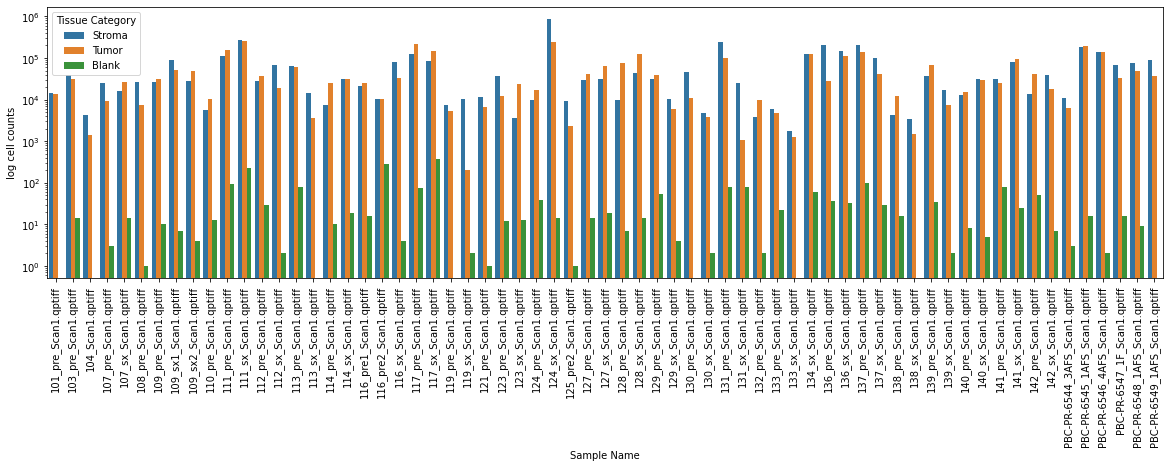

In [7]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
# Determine unique tissue_id values:
sns.barplot( x = 'Sample Name',
            y = 'Cell ID',
             data= tab.sort_values('Sample Name'),
             hue = 'Tissue Category',
             ax=ax)
plt.xticks(rotation = 90);
plt.yscale('log');
plt.ylabel('log cell counts')

In [34]:
df.columns[df.columns.str.contains('Phenotype')]

Index(['Phenotype-PD1', 'Phenotype-CD8', 'Phenotype-PDL1', 'Phenotype-CD3',
       'Phenotype-CK', 'Phenotype-FOXP3'],
      dtype='object')

# Examine PD1 vs. CD3

In [42]:
ids = merge.loc[:,'Sample Name'].unique()
p_frac = []
c3_frac = []
pc3_frac = []
c8_frac = []
pc8_frac = []
ck_frac = []
pck_frac = []
pc3c8_frac = []
pc3_c3frac = []
for i,s in enumerate(tqdm(ids)):
    idx = merge.loc[:,'Sample Name'].values == s
    tot = np.sum(idx)
    pd1 = merge.loc[idx,'Phenotype-PD1'].values == 'PD1+'
    p_frac.append(np.sum(pd1)/tot)
    cd3 = merge.loc[idx,'Phenotype-CD3'].values == 'CD3+'
    c3_frac.append(np.sum(cd3)/tot)
    pd1cd3 =pd1 & cd3
    pc3_frac.append(np.sum(pd1cd3)/tot)
    
    cd8 = merge.loc[idx,'Phenotype-CD8'].values == 'CD8+'
    c8_frac.append(np.sum(cd8)/tot)
    pd1cd8 = cd8 & pd1
    pc8_frac.append(np.sum(pd1cd8)/tot)
    ck = merge.loc[idx,'Phenotype-CK'].values == 'CK+'
    ck_frac.append(np.sum(ck)/tot)
    pck = ck & pd1
    pck_frac.append(np.sum(pck)/tot)
    
    pc3c8_frac.append(np.sum(pd1 & cd3 & cd8)/tot)
    pc3_c3frac.append(np.sum(pd1 & cd3)/np.sum(cd3))
    

100%|██████████| 65/65 [00:08<00:00,  7.71it/s]


No handles with labels found to put in legend.


Text(0, 0.5, 'PD1+CD8+CD3+ sample fraction')

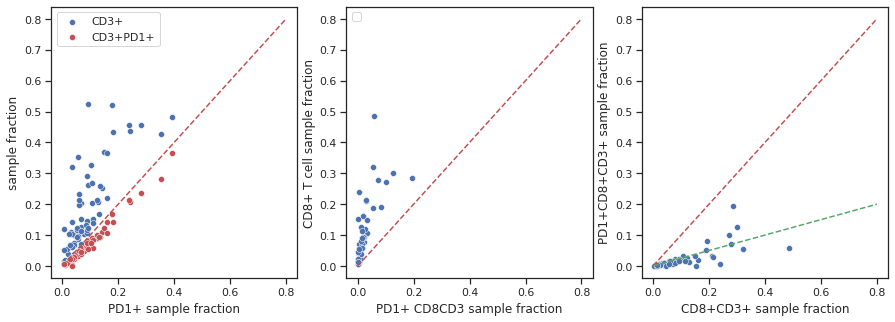

In [46]:
fig = plt.figure(figsize=[15,5])
ax = fig.add_subplot(1,3,1)
sns.scatterplot(x=p_frac,y=c3_frac,ax=ax,label='CD3+')
sns.scatterplot(x=p_frac,y=pc3_frac,ax=ax,color='r',label='CD3+PD1+')
plt.legend()
ax.plot([0,0.8],[0,0.8],'--r')
plt.xlabel('PD1+ sample fraction')
plt.ylabel('sample fraction')
    
ax = fig.add_subplot(1,3,2)
sns.scatterplot(x=pc3c8_frac,y=c8_frac,ax=ax)
# sns.scatterplot(x=p_frac,y=pck_frac,ax=ax,color='r')
plt.legend()
ax.plot([0,0.8],[0,0.8],'--r')
plt.xlabel('PD1+ CD8CD3 sample fraction')
plt.ylabel('CD8+ T cell sample fraction')


ax = fig.add_subplot(1,3,3)
# sns.scatterplot(x=c3_frac,y=pc3_c3frac,ax=ax)
sns.scatterplot(x=c8_frac,y=pc3c8_frac,ax=ax)
ax.plot([0,0.8],[0,0.8],'--r')
ax.plot([0,0.8],[0,0.2],'--g') # 25%
plt.xlabel('CD8+CD3+ sample fraction')
plt.ylabel('PD1+CD8+CD3+ sample fraction')

# ax = fig.add_subplot(1,3,3)
# sns.scatterplot(x=c3_frac,y=pc3_c3frac,ax=ax)
# # sns.scatterplot(x=p_frac,y=pc8_frac,ax=ax,color='r')
# ax.plot([0,0.8],[0,0.8],'--r')
# plt.xlabel('CD3+ sample fraction')
# plt.ylabel('PD-1+ CD3+ sample fraction')

# Define cell types

In [70]:
col_types = ['PD1','CD8', 'PDL1', 'CD3', 'CK', 'FOXP3']
cell_labels = ['PD1+','CD8+', 'PDL1+', 'CD3+', 'CK+', 'FOXP3+']

# #T-cell types (ideally also with and without PD-L1, one with CD8+):
multi_label_types = { #PDL1 for stroma/ Panck:
                     'PDL1+': {'PDL1+':True},
                     'CD3.CD8.PD1neg_Tcell': {'CD8+':True,'CD3+':True,'PD1+':False}, 
                     'CD3.CD8_Tcell': {'CD8+':True,'CD3+':True}, 
                     'CD3.CD8.PD1_Tcell': {'CD8+':True,'CD3+':True,'PD1+':True}, 
                     'CD3.CD8.PDL1_Tcell':{'CD8+':True,'CD3+':True,'PDL1+':True},
                     #CD3 tcell with FOXP3
                     'Treg': {'CD3+':True,'CD8+':False,'FOXP3+':True}, #Need to describe?
                    }
# For exclusive:

# multi_label_types = { #PDL1 for stroma/ Panck:
#                      'PDL1+': {'PDL1+':True},
#                      'CD8+_Tcell': {'CD8+':True,'CD3+':True}, 
#                      'CD8+_PD1_Tcell': {'CD8+':True,'CD3+':True,'PD1+':True}, 
#                      #CD3 tcell with FOXP3
#                      'Treg': {'CD3+':True,'FOXP3+':True}, #Need to describe?
#                     }

# Save table of co-expression cell types only

In [71]:
cell_cols = []
conf_cols = []
df = merge.copy()
for col in col_types:
    cell_cols.append('Phenotype-%s' % col)
    conf_cols.append('Confidence-%s' % col)
    
qc_thresh = 50
verbose = False
print('QC: %d' % qc_thresh)
exclusive= False
coex_df = pd.DataFrame([])
all_use = np.zeros((df.shape[0],)).astype(bool)
for comb_type in tqdm(multi_label_types.keys()):
    # print(comb_type)
    idx =  vecutils.multi_to_index(df,
                                 multi_label_types , 
                                 comb_type,
                                 exclusive=exclusive,
                                 col_types = cell_cols,
                                 qc_thresh= qc_thresh,
                                 verbose = verbose)
    all_use = all_use | idx
    df.loc[idx,'coex_cell']=comb_type

other_idx = ~all_use
print('other',np.sum(other_idx))
df.loc[other_idx,'coex_cell'] = 'Other'
if exclusive == True:
    coex_fn = results.joinpath('vectra_exclusive_mergepanel_%d_of_%d_qc%d_cell_seg_coex_summary.tsv' % (np.sum(all_use),
                                                                                          df.shape[0],
                                                                                          qc_thresh))
else:
    # Version 3 -> PD1+/- CD8 Tcell (not exclusive of other markers, i.e. other markers OK)
    # Version 4-> Include PDL1+ CD8 t cell
    coex_fn = results.joinpath('vectra_mergepanel_%d_of_%d_qc%d_cell_seg_coex_summary_v4.tsv' % (np.sum(all_use),
                                                                                          df.shape[0],
                                                                                          qc_thresh))
print(coex_fn)
df.to_csv(coex_fn,index=False, sep='\t')
df.groupby(['coex_cell'])['sample_type'].count()

QC: 50


100%|██████████| 6/6 [01:11<00:00, 11.93s/it]


other 4703206
/mnt/results/vectra_mergepanel_2820436_of_7523642_qc50_cell_seg_coex_summary_v4.tsv


coex_cell
CD3.CD8.PD1_Tcell       69688
CD3.CD8.PDL1_Tcell      91760
CD3.CD8_Tcell          189670
Other                 4703206
PDL1+                 2198433
Treg                   270885
Name: sample_type, dtype: int64

In [80]:
df.groupby(['coex_cell'])['sample_type'].count()

coex_cell
CD3.CD8.PD1_Tcell       69688
CD3.CD8.PDL1_Tcell      91760
CD3.CD8_Tcell          189670
Other                 4703206
PDL1+                 2198433
Treg                   270885
Name: sample_type, dtype: int64

# Load coexpressing cell data

In [5]:
exclusive = False
if exclusive:
    df = pd.read_csv(results.joinpath('vectra_exclusive_mergepanel_906984_of_7523642_qc50_cell_seg_coex_summary.tsv'),
                                  sep='\t')
else:
    df = pd.read_csv(results.joinpath('vectra_mergepanel_2820431_of_7523642_qc50_cell_seg_coex_summary_v2.tsv'),
                                  sep='\t')
print(df.shape)
pt_ID=df.loc[:,'Sample Name'].str.split('_').str[0]
np.unique(pt_ID)

(7523642, 37)


array(['101', '103', '104', '107', '108', '109', '110', '111', '112',
       '113', '114', '116', '117', '119', '121', '123', '124', '125',
       '127', '128', '129', '130', '131', '132', '133', '134', '136',
       '137', '138', '139', '140', '141', '142', 'PBC-PR-6544',
       'PBC-PR-6545', 'PBC-PR-6546', 'PBC-PR-6547', 'PBC-PR-6548',
       'PBC-PR-6549'], dtype=object)

In [11]:
pt_ID=df.loc[:,'Sample Name'].str.split('_').str[0]
np.unique(pt_ID)
pre_post = df.loc[:,'Sample Name'].str.split('_').str[1]
np.unique(pre_post)

array(['1AFS', '1F', '3AFS', '4AFS', 'Scan1.qptiff', 'pre', 'pre1',
       'pre2', 'sx', 'sx1', 'sx2'], dtype=object)

In [81]:
pt_ID=df.loc[:,'Sample Name'].str.split('_').str[0]
pre_post = df.loc[:,'Sample Name'].str.split('_').str[1]
df.loc[:,'Study_ID'] = pt_ID
df.loc[:,'pre_post'] = pre_post

section_labeled = {'104': ('104','pre'), #Deals with mislabel of 104_Scan1 (POST defined below! so not overwriting both)
                   # 'PBC-PR-6544': ('NA', 'NA'), # Just note that there is a scan that has no associated patient etc
                   'PBC-PR-6545': ('101','sx'),
                   'PBC-PR-6546': ('104','sx'),
                   'PBC-PR-6547': ('108','sx'),
                   'PBC-PR-6548': ('121','sx'),
                   'PBC-PR-6549': ('125','sx'),
                   '142': ('143',''), #142 pre and sx-> mislabeling of 143 - Hous correspondence
                  }

for lab in section_labeled.keys():
    idx = df.Study_ID == lab
    df.loc[idx,'Study_ID'] = section_labeled[lab][0]
    if any(section_labeled[lab][1]):
        df.loc[idx,'pre_post'] = section_labeled[lab][1]
    
pre = df.pre_post.isin(['pre','pre1','pre2'])
post = df.pre_post.isin(['sx','sx1','sx2'])
df.loc[pre,'pre_post_all'] = 'pre'
df.loc[post,'pre_post_all'] = 'post'

df_clean = df.loc[pre | post,:].copy()
df_clean.loc[:,'Study_ID'] = df_clean.Study_ID.astype(int)
df_clean.loc[pre,'pre_post'] = 'pre'
df_clean.loc[post,'pre_post'] = 'post'
print(df_clean.shape)
df_clean.head(n=1)

(7506367, 40)


,Path,Sample Name,Tissue Category,Phenotype-PD1,Phenotype-CD8,Phenotype-PDL1,Phenotype-CD3,Phenotype-CK,Phenotype-FOXP3,Cell ID,...,Confidence-CK,Confidence-FOXP3,inForm 2.6.7900.18857,tissue_id,sample_type,tma_wts,coex_cell,Study_ID,pre_post,pre_post_all
0,D:\Data\VectraPolaris\Lazar_Hous_18-139\137_sx...,137_sx_Scan1.qptiff,Tumor,NaN,NaN,NaN,NaN,NaN,NaN,84308,...,NaN,NaN,NaN,"137_sx_Scan1_[12454,47316]",WTS,WTS,Other,137,post,post


In [82]:
paired_df = df.groupby(['Study_ID','pre_post_all'])['Sample Name'].unique().reset_index()
paired_df = paired_df.pivot(index='Study_ID', columns='pre_post_all', values='Sample Name')
print(np.sum(~paired_df.pre.isna()))
print(np.sum(~paired_df.post.isna()))
print(len(df.loc[:,'Sample Name'].unique()))

32
30
65


In [83]:
paired_df.dropna().shape

(29, 2)

In [50]:
paired_df

pre_post_all,post,pre
Study_ID,,
101,[PBC-PR-6545_1AFS_Scan1.qptiff],[101_pre_Scan1.qptiff]
103,NaN,[103_pre_Scan1.qptiff]
104,[PBC-PR-6546_4AFS_Scan1.qptiff],[104_Scan1.qptiff]
107,[107_sx_Scan1.qptiff],[107_pre_Scan1.qptiff]
108,[PBC-PR-6547_1F_Scan1.qptiff],[108_pre_Scan1.qptiff]
109,"[109_sx2_Scan1.qptiff, 109_sx1_Scan1.qptiff]",[109_pre_Scan1.qptiff]
110,NaN,[110_pre_Scan1.qptiff]
111,[111_sx_Scan1.qptiff],[111_pre_Scan1.qptiff]
112,[112_sx_Scan1.qptiff],[112_pre_Scan1.qptiff]


In [11]:
idx = df.loc[:,'Tissue Category'].values == 'Tumor'
print(len(df.Study_ID[idx].unique()))
idx = df.loc[:,'Tissue Category'].values == 'Stroma'
print(len(df.Study_ID[idx].unique()))
# print(df.
idx = df_clean.loc[:,'Tissue Category'].values == 'Tumor'
print(len(np.sort(df_clean.Study_ID[idx].unique())))
np.sort(df_clean.Study_ID.unique())

34
34
33


array([101, 103, 104, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117,
       119, 121, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134,
       136, 137, 138, 139, 140, 141, 143])

In [9]:
print(df_clean.shape)

(7506367, 39)


## Merge these with clinical info

In [84]:
use = info.Study_ID.isin([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 116, 117, 119, 120, 121, 123, 124, 125, 127, 128, 129, 130,
       131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 143, 148, 149,
       150])
info_clean = info.loc[use,:].copy()

In [11]:
info_clean.columns

Index(['Study_ID', 'Initials', 'DOB', 'HPV', 'Regimen assigned', 'Screen',
       'HN#(pre)', 'C1D1', 'Surgery', 'HN#(post)', 'Path_response',
       'Path_response_categories',
       'Volumetric response (%change from baseline)',
       'RECIST Overall response', 'PD-L1', 'LAG3', 'Unnamed: 16'],
      dtype='object')

In [85]:
use = info.Study_ID.isin([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 116, 117, 119, 120, 121, 123, 124, 125, 127, 128, 129, 130,
       131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 143, 148, 149,
       150])
info_clean = info.loc[use,:].copy()
df_clin = pd.merge(df_clean,info_clean,on='Study_ID',how='left')
df_clin.loc[:,['Study_ID','pre_post',
               'Tissue Category',
               'coex_cell','Path_response','Regimen assigned',
               'Path_response_categories']].head()

,Study_ID,pre_post,Tissue Category,coex_cell,Path_response,Regimen assigned,Path_response_categories
0,137,post,Tumor,Other,0.0,Nivo alone,pNR
1,137,post,Stroma,CD3.CD8.PDL1_Tcell,0.0,Nivo alone,pNR
2,137,post,Stroma,Other,0.0,Nivo alone,pNR
3,137,post,Stroma,Other,0.0,Nivo alone,pNR
4,137,post,Stroma,PDL1+,0.0,Nivo alone,pNR


In [ ]:
df_clin.groupby(['Study_ID'])['Path_response'].unique().

In [68]:
np.sum(df_clin.groupby(['Study_ID'])['Path_response'].unique().reset_index().Path_response==0)

12

In [13]:
print(df_clin.shape,len(np.sort(df_clin.Study_ID.unique())))
np.sort(df_clin.Study_ID.unique())

(7506367, 55) 33


array([101, 103, 104, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117,
       119, 121, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134,
       136, 137, 138, 139, 140, 141, 143], dtype=object)

In [14]:
df_clin.groupby(['Study_ID','pre_post','Tissue Category','coex_cell'])['coex_cell'].count()

Study_ID  pre_post  Tissue Category  coex_cell           
101       post      Blank            Other                       15
                                     Treg                         1
                    Stroma           CD3.CD8.PD1_Tcell          281
                                     CD3.CD8.PD1neg_Tcell      2713
                                     Other                   121205
                                                              ...  
143       pre       Tumor            CD3.CD8.PD1_Tcell            7
                                     CD3.CD8.PD1neg_Tcell        69
                                     Other                    35124
                                     PDL1+                     5623
                                     Treg                       659
Name: coex_cell, Length: 714, dtype: int64

In [ ]:
# 2820431_of_7523642

In [53]:
fn = 'vectra_mergepanel_withclin_2820431_of_7523642_qc50_cell_seg_coex_summary.tsv'
print(results.joinpath(fn))
df_clin.to_csv(results.joinpath(fn),sep='\t')

/mnt/results/vectra_mergepanel_withclin_2815431_of_7499845_qc50_cell_seg_coex_summary.tsv


## Which are paired in vectra pre-post, and what's missing?

In [15]:
df_clin.columns

Index(['Path', 'Sample Name', 'Tissue Category', 'Phenotype-PD1',
       'Phenotype-CD8', 'Phenotype-PDL1', 'Phenotype-CD3', 'Phenotype-CK',
       'Phenotype-FOXP3', 'Cell ID', 'Total Cells',
       'Tissue Category Area (square microns)', 'Cell Density (per square mm)',
       'Cell X Position', 'Cell Y Position', 'Process Region ID',
       'Distance from Process Region Edge (microns)', 'Category Region ID',
       'Distance from Tissue Category Edge (microns)', 'Lab ID', 'Slide ID',
       'Annotation ID', 'TMA Sector', 'TMA Row', 'TMA Column', 'TMA Field',
       'Confidence-PD1', 'Confidence-CD8', 'Confidence-PDL1', 'Confidence-CD3',
       'Confidence-CK', 'Confidence-FOXP3', 'inForm 2.6.7900.18857',
       'tissue_id', 'sample_type', 'tma_wts', 'coex_cell', 'Study_ID',
       'pre_post', 'Initials', 'DOB', 'HPV', 'Regimen assigned', 'Screen',
       'HN#(pre)', 'C1D1', 'Surgery', 'HN#(post)', 'Path_response',
       'Path_response_categories',
       'Volumetric response (%chan

In [18]:
paired_stroma = []
paired_tumor = []
vals = []
for pt in df_clin.Study_ID.unique():
    idx = df_clin.Study_ID.values == pt
    tumor = df_clin.loc[:,'Tissue Category'].values == 'Tumor'
    stroma = df_clin.loc[:,'Tissue Category'].values == 'Stroma'
    if len(df_clin.loc[idx & tumor,'pre_post'].unique())==2:
        paired_tumor.append(pt)
    if len(df_clin.loc[idx & stroma,'pre_post'].unique())==2:
        paired_stroma.append(pt)    
paired_tumor = np.array(paired_tumor)
print(len(paired_tumor))
print(np.sort(paired_tumor))
paired_stroma = np.array(paired_stroma)
print(len(paired_stroma))
print(np.sort(paired_stroma))
print(np.sum(pd.Series(paired_tumor).isin(paired_stroma)))

29
[101 104 107 108 109 111 112 113 114 116 117 119 121 123 124 125 127 128
 129 130 131 133 136 137 138 139 140 141 143]
29
[101 104 107 108 109 111 112 113 114 116 117 119 121 123 124 125 127 128
 129 130 131 133 136 137 138 139 140 141 143]
29


In [ ]:
idx = df_clin.loc[:,'Tissue Category'].isin(['Tumor','Stroma'])
counts = df_clin.loc[idx,:].sort_values('Study_ID').groupby(['Study_ID','Tissue Category','pre_post'])['coex_cell'].count()
counts = counts.reset_index()

In [43]:
counts.coex_cell.mean()

60517.6129032258

In [45]:
counts.loc[counts.Study_ID==130,:]

,Study_ID,Tissue Category,pre_post,coex_cell
80,130,Stroma,post,4763
81,130,Stroma,pre,45304
82,130,Tumor,post,3733
83,130,Tumor,pre,11093


In [44]:
counts.loc[counts.coex_cell.values < 500,:]

,Study_ID,Tissue Category,pre_post,coex_cell
50,119,Tumor,post,202


In [42]:
counts.Study_ID.unique()

array([101, 103, 104, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117,
       119, 121, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134,
       136, 137, 138, 139, 140, 141, 143])

In [21]:
for p in np.sort(paired):
    print('%s,' % p,end=' ')

101, 104, 107, 108, 109, 111, 112, 113, 114, 116, 117, 119, 121, 123, 124, 125, 127, 128, 129, 130, 131, 133, 136, 137, 138, 139, 140, 141, 143, 

In [56]:
print(np.sort(df_clin.Study_ID.unique()))

[101 103 104 107 108 109 110 111 112 113 114 116 117 119 121 123 124 125
 127 128 129 130 131 132 133 134 136 137 138 139 140 141 143]


## List from Hous of all data that should be paired:

should_have -> 101, 104, 107,108,109,111,112,113,114,116,117,119,121,123,124,125,127,128,129,130,131,133,134,136,137,138,139,140,141,142

In [33]:
len([101, 104, 107,108,109,111,112,113,114,116,117,119,121,123,124,125,127,128,129,130,131,133,134,136,137,138,139,140,141,142])

30

In [22]:
should_have = np.array([101, 104, 107,108,109,111,112,113,114,116,117,119,121,123,124,125,
                        127,128,129,130,131,133,134,136,137,138,139,140,141,142])
not_have = should_have[~pd.Series(should_have).isin(paired)]
df_clean.loc[df_clean.Study_ID.isin(not_have),:].groupby(['Study_ID','pre_post'])['coex_cell'].count()

Study_ID  pre_post
134       post        252460
Name: coex_cell, dtype: int64

## Paired sample followup:

Sample 134 does not have pre data to pair, sample 119 and 130 post do not have tumor in the vectra tissue, sample 138 post status unknown

# Plot N of each coex cell

Text(0, 0.5, 'log cell counts')

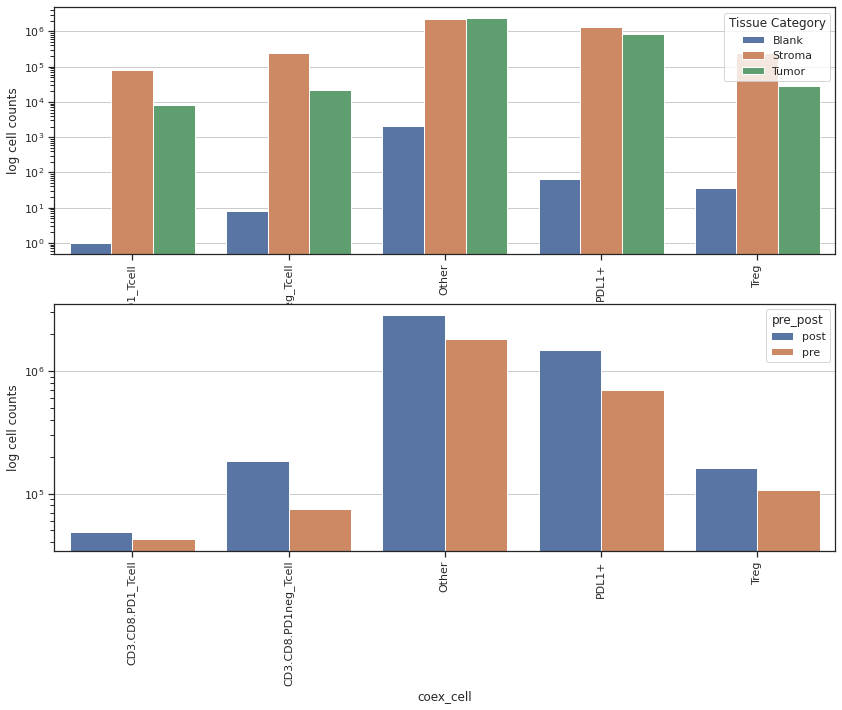

In [51]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(2,1,1)
sns.set_style("darkgrid")
sns.set(style="ticks")
tab = df_clin.groupby(['coex_cell','Tissue Category'])['Cell ID'].count().to_frame().reset_index()
ax = sns.barplot(x = 'coex_cell',
                 y='Cell ID',
             data= tab.sort_values('coex_cell'),
             hue = 'Tissue Category',
             ax=ax)
ax.grid(axis='y')
plt.xticks(rotation = 90);
plt.yscale('log');
plt.ylabel('log cell counts')

ax = fig.add_subplot(2,1,2)
tab = df_clin.groupby(['coex_cell','pre_post'])['Cell ID'].count().to_frame().reset_index()
ax = sns.barplot(x = 'coex_cell',
                 y='Cell ID',
             data= tab.sort_values('coex_cell'),
             hue = 'pre_post',
             ax=ax)
ax.grid(axis='y')
plt.xticks(rotation = 90);
plt.yscale('log');
plt.ylabel('log cell counts')

## Exclusive co-labeling version:

Text(0, 0.5, 'log cell counts')

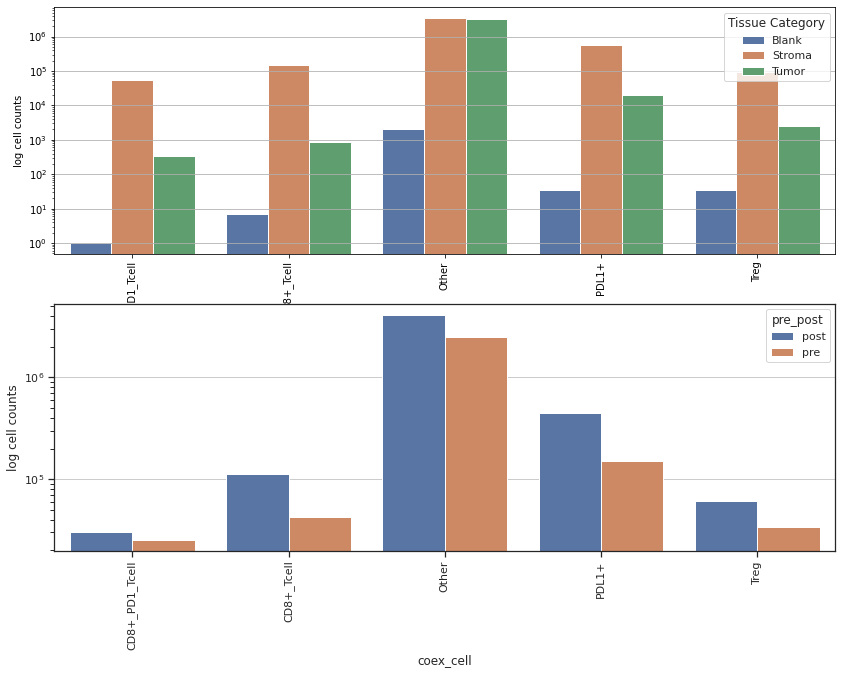

In [12]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(2,1,1)
sns.set_style("darkgrid")
sns.set(style="ticks")
tab = df_clin.groupby(['coex_cell','Tissue Category'])['Cell ID'].count().to_frame().reset_index()
ax = sns.barplot(x = 'coex_cell',
                 y='Cell ID',
             data= tab.sort_values('coex_cell'),
             hue = 'Tissue Category',
             ax=ax)
ax.grid(axis='y')
plt.xticks(rotation = 90);
plt.yscale('log');
plt.ylabel('log cell counts')

ax = fig.add_subplot(2,1,2)
tab = df_clin.groupby(['coex_cell','pre_post'])['Cell ID'].count().to_frame().reset_index()
ax = sns.barplot(x = 'coex_cell',
                 y='Cell ID',
             data= tab.sort_values('coex_cell'),
             hue = 'pre_post',
             ax=ax)
ax.grid(axis='y')
plt.xticks(rotation = 90);
plt.yscale('log');
plt.ylabel('log cell counts')


# Generate cell density (%)

In [75]:
paired = [101, 104, 107, 108, 109, 111, 112, 113, 114, 116, 117,
             121, 123, 124, 125, 127, 128, 129, 130, 131, 133, 136, 137, 
             138, 139, 140, 141, 143]
use_samps = df_clin.Study_ID.isin(paired)
np.sum(use_samps)
len(df_clin.loc[use_samps,'Study_ID'].unique())

28

In [76]:
bad_regimen = df_clin.loc[:, 'Regimen assigned'].isna()
df_clin.loc[bad_regimen & use_samps, 'Study_ID'].unique()

array([], dtype=object)

In [77]:
no_regimen = df_clin.loc[:,'Regimen assigned'].isna()
use_paired_samps = df_clin.Study_ID.isin(paired) & ~no_regimen

n_paired = len(df_clin.loc[use_paired_samps,'Study_ID'].unique())
print(n_paired)

28


In [ ]:
multi_label_types = { #PDL1 for stroma/ Panck:
                     'PDL1+': {'PDL1+':True},
                     'CD3.CD8.PD1neg_Tcell': {'CD8+':True,'CD3+':True,'PD1+':False}, 
                     'CD3.CD8.PD1_Tcell': {'CD8+':True,'CD3+':True,'PD1+':True}, 
                     #CD3 tcell with FOXP3
                     'Treg': {'CD3+':True,'CD8+':False,'FOXP3+':True}, #Need to describe?
                    }

In [86]:
np.sum(df_clin.coex_cell.str.contains('CD3.CD8.PDL1_Tcell'))

91681

In [87]:
#
no_regimen = df_clin.loc[:,'Regimen assigned'].isna() #Pt 142 not in clinical info? ->Should be 143
use_paired_samps = df_clin.Study_ID.isin(paired) & ~no_regimen
n_paired = len(df_clin.loc[use_paired_samps,'Study_ID'].unique())
pts = df_clin.loc[use_paired_samps,'Study_ID'].unique()
print('Samples n=',len(pts)*2)
verbose = False
multi_label_types = {#PDL1 for stroma/ Panck:
                     'PDL1_tumor': {'PDL1+':True},
                     'PDL1_stroma':{'PDL1+':True},
                     'PDL1_all': {'PDL1+':True},
    
                     #CD8 Tcell  
                     'CD3.CD8.PD1neg_tumor': {'CD3.CD8.PD1neg_Tcell':True}, 
                     'CD3.CD8.PD1neg_stroma': {'CD3.CD8.PD1neg_Tcell':True}, 
                     'CD3.CD8.PD1neg_all': {'CD3.CD8.PD1neg_Tcell':True}, 
    
                     #Activated CD8 Tcell  
                     'CD3.CD8.PD1_tumor': {'CD3.CD8.PD1_Tcell':True}, 
                     'CD3.CD8.PD1_stroma': {'CD3.CD8.PD1_Tcell':True}, 
                     'CD3.CD8.PD1_all': {'CD3.CD8.PD1_Tcell':True}, 
                    
                     #PDL1 CD8:
                     'CD3.CD8.PDL1_tumor': {'CD3.CD8.PDL1_Tcell':True}, 
                     'CD3.CD8.PDL1_stroma': {'CD3.CD8.PDL1_Tcell':True}, 
                     'CD3.CD8.PDL1_all': {'CD3.CD8.PDL1_Tcell':True}, 
    
                     #CD3 tcell with FOXP3
                     'Treg_tumor': {'Treg':True},
                     'Treg_stroma': {'Treg':True},
                     'Treg_all': {'Treg':True},
                    }
cell_labels = [x for x in multi_label_types.keys()]
fdr_n = len(cell_labels)
for data_type in ['percent','counts']:
    if data_type == 'counts':
        save_counts = True
    else:
        save_counts = False
    sample_df = pd.DataFrame([])
    for pt in tqdm(pts):
        for pre_post in ['pre','post']: #Allows samples with multiple pre/post entries to combine
            idx = (df_clin.Study_ID.values == pt) & (df_clin.pre_post.values == pre_post)
            subset = df_clin.loc[idx,:].copy().reset_index(drop=True)
            arm = subset.loc[0,'Regimen assigned']    
            timepoint = subset.loc[0,'pre_post']
            temp_df =subset.loc[[0],['Sample Name','Study_ID','Regimen assigned','pre_post']].copy()
            if verbose:
                print(samp,arm,timepoint,subset.coex_cell.unique(),sep=',')    
            for cell in cell_labels:                      
                tot = subset.shape[0]
                idx = (np.zeros((tot,))+1).astype(bool) # Start true
                for cond in multi_label_types[cell]:     
                    use = multi_label_types[cell][cond]
                    idx = idx & (subset.coex_cell.str.contains(cond,regex=False) == use)

                if ('tumor' in cell):
                    idx2 = subset.loc[:,'Tissue Category'].values == 'Tumor' 
                    idx = idx & idx2           
                    tot = np.sum(idx2) # All tumor cells
                elif ('stroma' in cell):
                    idx2 = subset.loc[:,'Tissue Category'].values == 'Stroma' 
                    idx = idx & idx2
                    tot = np.sum(idx2) #All stromal cells
                #Else tot remains same (all cells) and percent is total (tumor + stroma)

                counts = np.sum(idx)
                percent = counts / tot * 100
                if verbose:
                    print(cell,tot,percent,subset.loc[idx,'coex_cell'].unique(),np.sum(idx))
                if save_counts:
                    temp_df.loc[0,'%s_%s' % (cell,data_type)] = counts
                    temp_df.loc[0,'%s_%s' % (cell,'denominator')] = tot
                else:
                    temp_df.loc[0,'%s_%s' % (cell,data_type)] = percent

            sample_df = pd.concat((sample_df,temp_df),axis=0)

    sample_df = sample_df.reset_index(drop=True)
    sample_df = sample_df.sort_values('Study_ID')
    if exclusive:
        fn = 'cell_density_%d_paired_good_samples_exclusive_tumor_stroma_%d_%s.csv' % (sample_df.shape[0],
                                                                      sample_df.shape[1],
                                                                      data_type)
    else:
        fn = 'cell_density_%d_paired_good_samples_all_inc_tumor_stroma_%d_%s_v4.csv' % (sample_df.shape[0],
                                                                      sample_df.shape[1],
                                                                      data_type)
    pnfn = results.joinpath(fn)
    print(pnfn)
    sample_df.to_csv(pnfn,index=False)
    

  0%|          | 0/28 [00:00<?, ?it/s]

Samples n= 56


  0%|          | 0/28 [00:00<?, ?it/s]

/mnt/results/cell_density_56_paired_good_samples_all_inc_tumor_stroma_19_percent_v4.csv


100%|██████████| 28/28 [00:47<00:00,  1.69s/it]

/mnt/results/cell_density_56_paired_good_samples_all_inc_tumor_stroma_34_counts_v4.csv
